In [3]:
%matplotlib inline

In [4]:
import random, pylab, math


In this homework session, you will experience the power of Markov-chain Monte Carlo algorithms, and the intimate relation between sampling and integration.

This homework involves hypherspheres, hypercubes and hypercylinders:
Sampling a point in a hypercube is easy (and computing its volume trivial). This allows us to sample a
point in the hypersphere, and to compute the hypersphere volume, but in high dimension, this recipe is no good.

Sampling a point in a (d+1)-dimensional hypercylinder is easy for all d, if we know how to sample a
point in the d-dimensional hypersphere. This allows us to compute the ratio of volumes of the (d+1)-
dimensional hypersphere to the d-dimensional hypersphere.

A recurrence strategy finally allows you to compute the volume of the d-dimensional hypersphere.

Summary: We first provide a glossary of terms and a preparation program:

GLOSSARY OF TERMS:
* **Sphere of radius r**: a three-dimensional object containing all points
$x, y, z$ with $x^2 + y^2 + z^2 < r^2$. Its volume is $Vol_{s}(r, d=3)$.
* **Unit sphere**: sphere of radius 1. Its volume is $Vol1_{s}(d=3)$.
* **Unit hypersphere** in d dimensions: d-dimensional object containing all points
$x_0, \ldots, x_{d-1}$ with $x_0^2 + \ldots + x_{d-1} ^2 < 1$. Its volume is $Vol1_{s}(d)$.
* **Unit hypercube** in d dimensions: d-dimensional object containing all points $x_0, ..., x_{d-1}$ such that $-1 < x_0 < 1, \ldots -1 < x_{d-1} < 1$. Its volume is $Vol1_{cube}(d)$.
* **Unit cylinder**: a three-dimensional object containing all points $x, y, z$ such tht $x^2 + y^2 < 1$ and $-1 < z < 1$. Its volume is $Vol1_{cyl}(d=3)$.
* **Unit hypercylinder** in d dimensions: d-dimensional object containing all points $x_0, ..., x_{d-1}$ such that $x_0^2 + \ldots + x_{d-2} ^2 < 1$ and $-1 < x_{d-1} < 1$. Its volume is $Vol1_{cyl}(d)$.

## Preparation program

In [5]:
import random, math
def Vol1_s(dimension):
    return math.pi ** (dimension / 2.0)/ math.gamma(dimension / 2.0 + 1.0)

for dimension in range(1,20):
    print dimension, Vol1_s(dimension)

1 2.0
2 3.14159265359
3 4.18879020479
4 4.93480220054
5 5.26378901391
6 5.16771278005
7 4.72476597033
8 4.05871212642
9 3.29850890274
10 2.55016403988
11 1.88410387939
12 1.33526276885
13 0.910628754783
14 0.599264529321
15 0.381443280823
16 0.235330630359
17 0.140981106917
18 0.0821458866111
19 0.0466216010301


## A1

## Questions:

1. What is the volume of the three-dimensional sphere of radius r, Vol_s(r,3)? (give formula)
2. What is the volume of the three-dimensional unit sphere? (give formula)
3. What is the volume of the d-dimensional unit hypersphere? (give formula) (NB: see PREPARATION
PROGRAM)
4. What is the volume of the (d+1)-dimensional unit hypercylinder Vol1_cyl(d+1)?(give formula involving
Vol1_s(d)).
5. What is the volume of the d-dimensional unit hypercube? (give formula)

## Answers:
1. $V_s(r,3)= \frac{4}{3} \pi r^3$
2. $V_s(1,3)= \frac{4}{3} \pi$
3. $V_s(r,d)= \frac{\pi^{\frac{d}{2}}}{\Gamma(\frac{d}{2}+1)} r^d$
4. $V_{cyl}(r,h,d)= \frac{\pi^{\frac{d-1}{2}}}{\Gamma(\frac{d-1}{2}+1)} r^{d-1} h$ so that $V_{cyl}(r,h,d+1)=V_s(r,d)h$
5. $V_{cube}(r,d)=r^d$

## A2

## Questions

1. Can you confirm that the preparation program computes the volume of the unit hypersphere in dimensions from 1
to 19? (Yes/No answer)
2. Explain how to modify this program to compute the volume of the hypersphere of radius r.
3. Extend the Preparation Program into a graphics version, and plot the quantity "Vol1_s" for all dimensions d from 1 through 200. Use linear scale in $x$ and logarithmic scale in $y$. Compute and display the numerical values Vol1_s(5), Vol1_s(20), Vol1_s(200), as you will need them later.

## Answers:
1. Considering we have analytical formula that can be derived from direct integration of d-dimensional sphere main issue might come from implementation of $\Gamma(n)$ function.
2. Well I allready have given general formula $V_s(r,d)= \frac{\pi^{\frac{d}{2}}}{\Gamma(\frac{d}{2}+1)} r^d$.

Vol1_s(5)   = 5.263789e+00
Vol1_s(20)  = 2.580689e-02
Vol1_s(200) = 5.558833e-109


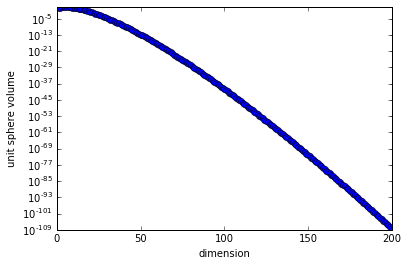

In [6]:
volume_s = []
d = 200
for dimension in xrange(1,d+1):
    volume_s.append(Vol1_s(dimension))

print "Vol1_s(5)   = %e"%(volume_s[5-1])
print "Vol1_s(20)  = %e"%(volume_s[20-1])
print "Vol1_s(200) = %e"%(volume_s[200-1])

pylab.plot(range(1,d+1), volume_s, 'o')
pylab.gca().set_yscale('log')
pylab.xlabel('dimension')
pylab.ylabel('unit sphere volume')
pylab.savefig('UnitSphereVolumeAsFunctionOfDimension.png')
pylab.show()

# B
**Summary:**
First, you will write a direct sampling algorithm for points in the d-dimensional unit hypercube. This generalizes what was done in week 1. You will then compute Vol1_s(d)/Vol1_cube(d) from the ratio of hits to trials - this is a generalization of what you already did in homework 1.

You will then write a MCMC algorithm inside the unit hypersphere in d dimensions, and compare the (d+1)-dimensional unit hypersphere to the (d+1)-dimensional unit-hypercylinder.

Finally, you will use some accordion-style considerations, in order to compute the volume of the 200-dimensional unit hypersphere

## B1

Generalize the program for direct sampling of the disk area in 2D, into a program valid for d dimensions.
This allows you to sample points in the d-dimensional unit hypercube and to compute Vol1_s(d)/Vol1_cube(d) from the ratio of hits to trials. In your algorithm, implement the tabula-rasa rule, and break out of the construction of the vector $x_0, x_1,..., x_k, \ldots, x_{d-1}$ as soon as $x_0^2 + \ldots + x_k^2 > 1$.

Use n_trials=1000000 for each dimension $d=1,2,3, \ldots ,12$. You may repeatedly run the program for
dimensions d=1,2,3... or implement a loop over dimensions. Stop as soon as, for a given dimension, you have zero hits for n_trials trials (this will appear quite rapidly).

## Question

Provide your program and a table listing:

estimation of Vol1_s(d), exact value of Vol1_s(d) (exact), and n_hits,

against the dimension d (skeleton provided below)

In [7]:
def pointInSphere(dimension):
    vectorLength = 0.0
    for i in xrange(dimension):
        vectorLength += random.uniform(-1.0, 1.0)**2  #get point in unit square in next dimension
        if vectorLength > 1.0:
            return False
    return True

#header
print "--------------------------------------------------------"
print "1000000 trials used for all dimensions                  "
print "d | estimation of Vol1_s(d) | Vol1_s(d) (exact) | n_hits"
print "--------------------------------------------------------"

def testDimensions(maxDimension):
    for d in xrange(maxDimension):
        hits = 0
        for trial in xrange(n_trials):
            if pointInSphere(d):
                hits += 1
        if (hits == 0):
            return
        else:
            print "%2i| %f\t|%f|%i"%(d, (2**(d))*(float(hits)/float(n_trials)), Vol1_s(d), hits)

n_trials = 1000000  #how many times we try to hit point into d-dinemsnional ball
testDimensions(20)

--------------------------------------------------------
1000000 trials used for all dimensions                  
d | estimation of Vol1_s(d) | Vol1_s(d) (exact) | n_hits
--------------------------------------------------------
 0| 1.000000	|1.000000|1000000
 1| 2.000000	|2.000000|1000000
 2| 3.142764	|3.141593|785691
 3| 4.189224	|4.188790|523653
 4| 4.924832	|4.934802|307802
 5| 5.281120	|5.263789|165035
 6| 5.150144	|5.167713|80471
 7| 4.710144	|4.724766|36798
 8| 4.080896	|4.058712|15941
 9| 3.270656	|3.298509|6388
10| 2.466816	|2.550164|2409
11| 1.837056	|1.884104|897
12| 1.290240	|1.335263|315
13| 0.843776	|0.910629|103
14| 0.425984	|0.599265|26
15| 0.360448	|0.381443|11
16| 0.262144	|0.235331|4
17| 0.131072	|0.140981|1


## B2

Generalize the MCMC implementation of the sampling of points inside a 2D disk, so that is samples points inside the d-dimensional unit hypersphere:

* Represent the configuration point as a list: x = [x_0, x_1,...., x_k, ..., x_{d - 1}]
* Start at the origin [0.0, 0.0, 0.0, ... 0.0] (program this as: x = [0] * d).
* Instead of changing all dimensions at a time, as was done previously, for all iterations i = 0, 1, 2,...., n_trials: sample ONE dimension k and propose a change of x[k] only: 

k = random.randint(0, d - 1)
x_new_k = x[k] + random.uniform(-1.0, 1.0)

ACCEPT this move if the new radius < 1, otherwise REJECT and remain where you are.

Hint: you may test this program for d=2 in the following way:
* Produce a scatter plot of positions, and check that they look reasonable (for yourself, I will not check it).
* Compute the mean value of ```r^2 = x[0] **2 + x[1] ** 2```. In d=2, this value should be equal to 1/2.

## Questions

1. Explain why $<r^2> = \frac{1}{2}$

2. Give the program for general d below.

1. Probability of finding point on circle is proportional to ist length $P(\alpha, r)=\frac{1}{2\pi r)$, average values is integral over whole space of $r^2$ times probability so that $<r^2> = \int_0^{2\pi}\int_0^{R}r^2 P(\alpha, r) dr d\alpha = \int_0^{2\pi}\int_0^{R}r^2 \frac{1}{2\pi r} dr d\alpha$ since probability is not dependent on angle we can integrate it out and write $<r^2> = 2\pi \int_0^{R}\frac{r}{2\pi} dr$ which gives $<r^2> = \frac{1}{2}$

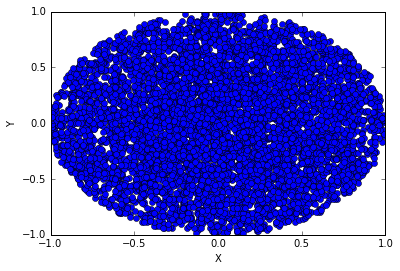

In [8]:


def randInSphere(conf, dimension, n_trials):
    squares = [i**2 for i in conf]
    vectorLength = sum(conf)
    if vectorLength > 1:
        print "Initial configuration is out of unit circle!"
        return 1
    
    pointPositions_x.append([conf[0]])
    pointPositions_y.append([conf[1]])
    
    for trial in xrange(n_trials):
        k = random.randint(0, dimension-1)
        x_new = conf[k] + random.uniform(-1.0, 1.0)
        x_new_2 = x_new**2
        if (x_new_2 <= squares[k]): # automaticly can be accepted since new position is closer to origin
            vectorLength += (x_new_2 - squares[k])
            conf[k] = x_new
            squares[k] = x_new_2

            pointPositions_x.append([conf[0]])
            pointPositions_y.append([conf[1]])
        elif ((vectorLength - squares[k] + x_new_2) < 1.0): # have to test if overall length of vector is still smaller then 1
            vectorLength += (x_new_2 - squares[k])
            conf[k] = x_new
            squares[k] = x_new_2
            
            pointPositions_x.append([conf[0]])
            pointPositions_y.append([conf[1]])
        else:
            continue

d = 2            
conf = [0.0]*d

pointPositions_x = []
pointPositions_y = []


randInSphere(conf, d, 10000)

pylab.plot(pointPositions_x, pointPositions_y, 'o')
pylab.xlabel('X')
pylab.ylabel('Y')
pylab.savefig('ScatterPlot.png')
pylab.show()

## B3

Extend the python program of section B2: Complement the random sample x_0...x_{d-1} in the d-dimensional hypersphere to a random sample in the (d+1)-dimensional unit HYPERCYLINDER, by simply drawing one additional random number ```x_supp=random.uniform(-1.0, 1.0)```, forming the set $x_0,...x_{d-1},x_{supp}$

Now, define an observable Q:
* Q = 1 if $x_0^2 + \ldots + x_{d - 1} ^2 + x_{supp} ^2 < 1$
* Q = 0 otherwise.

## Questions

1. Show that the following holds: $2 * <Q> = Vol1_s(d + 1) / Vol1_s(d)$
2. Display the numerical value for Vol1_s(d + 1) / Vol1_s(d), obtained with the help of your program, for d = 1, 2.

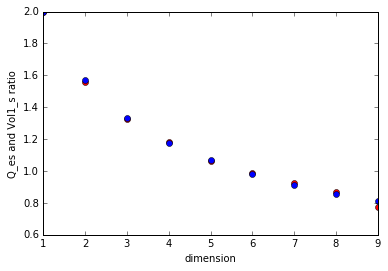

Numerical values for d=1 : 2.000000
Numerical values for d=2 : 1.559200


In [9]:
def getPointInCylinder(dimension):
    vector = []
    while len(vector) < dimension-1:
        vectorLength = 0.0
        vector = []
        for i in xrange(dimension-1):
            x = random.uniform(-1.0, 1.0)
            x_2 = x**2
            if (vectorLength + x_2) > 1.0:
                break
            else:
                vectorLength += x_2
                vector.append(x)
    vector.append(random.uniform(-1.0, 1.0))
    return vector

n_trials = 5000
Q_es = []
vol1_s_ratio = []
dimensions = range(1, 10)

for d in dimensions:
    Q = 0.0
    for trial in xrange(n_trials):
        vector = getPointInCylinder(d)
        vector_sq = [i**2 for i in vector]
        if sum(vector_sq) < 1:
            Q += 1.0
    Q_es.append(2*(Q/n_trials))
    vol1_s_ratio.append(Vol1_s(d)/Vol1_s(d-1))


pylab.plot(dimensions, Q_es, 'o',color='r')
pylab.plot(dimensions, vol1_s_ratio, 'o',color='b')
pylab.xlabel('dimension')
pylab.ylabel('Q_es and Vol1_s ratio')
pylab.savefig('4#B3.png')
pylab.show()
print "Numerical values for d=1 : %f\nNumerical values for d=2 : %f"%(Q_es[0], Q_es[1])

# C

In this section you get your program into shape for computing the ratio of volumes Vol1_s(200)/Vol_s(199) to high precision, and even V_h(200), from a series of calculations. Finally you do some error estimations.

## C1

Modify your program from section B (if necessary) to run in high dimensions: Each iteration should require a constant number of operations, independent of d:

* Don't compute the squared radius $x[0]^2 + ... + x[d-1]^2$ from scratch each time. Instead, calculate it from the previous configuration.
* Don't compute $x_0^2 + .... + x_{d - 1} ^2 + x_supp ^2$ (that is needed to evaluate <Q> ) from scratch each time. Instead, calculate it from what you already have available.

## **Questions**
1. Explain in a sentence what changes you have put into the fast version of the program.
2. Provide your program below, and use it to compute Vol1_s(200) / Vol1_s(199)
3. Compare your estimate with the exact result from section A.

In [20]:
def Vol1_s_MCMC(conf, dimension, n_trials):
    squares = [i**2 for i in conf]
    vectorLength = sum(conf)
    if vectorLength > 1:
        print "Initial configuration is out of unit circle!"
        return 1
    hit = True
    hits = 0
    for trial in xrange(n_trials):
        k = random.randint(0, dimension-1)
        x_new = conf[k] + random.uniform(-1.0, 1.0)
        if abs(x_new) < 1.0: # move is in cube and is acceptd
            x_new_2 = x_new**2
            if (x_new_2 <= squares[k]): # automaticly can be accepted since new position is closer to origin
                hit = True
                hits += 1
                vectorLength += (x_new_2 - squares[k])
                conf[k] = x_new
                squares[k] = x_new_2
            elif ((vectorLength - squares[k] + x_new_2) < 1.0): # have to test if overall length of vector is still smaller then 1
                hit = True
                hits += 1
                vectorLength += (x_new_2 - squares[k])
                conf[k] = x_new
                squares[k] = x_new_2
            else:
                hit = False # we are in cube but not in sphere
        else: # we get out of cube peble go back to its initial point
            if hit :
                hits += 1
    return (2**(d))*(float(hits)/float(n_trials))


print Vol1_s_MCMC([0]*200, 200, 100000)/Vol1_s_MCMC([0]*199, 199, 100000), Vol1_s(200)/Vol1_s(199)

def getPointInCylinder(dimension):
    vector = []
    while len(vector) < dimension-1:
        vectorLength = 0.0
        vector = []
        for i in xrange(dimension-1):
            x = random.uniform(-1.0, 1.0)
            x_2 = x**2
            if (vectorLength + x_2) > 1.0:
                break
            else:
                vectorLength += x_2
                vector.append(x)
    vector.append(random.uniform(-1.0, 1.0))
    return vector

n_trials = 50

Q = 0.0
for trial in xrange(n_trials):
    vector = getPointInCylinder(d)
    vector_sq = [i**2 for i in vector]
    if sum(vector_sq) < 1:
        Q += 1.0

#print 2*(Q/n_trials),  Vol1_s(200)/Vol1_s(199)


0.994330571304 0.177023967696


## C2

Now use a recurence strategy:
* Modify your program from C1 so that it performs independent calculations for d=1,
2, 3,..., 199, each time computing Vol1_s(d+1) / Vol1_s(d). Each of these calculations should start at the
origin ```x = [0] * d```.
* Put these results together with the analytical result of Vol1_s(1) to obtain Vol1_s(d).

## Questions

1. Explain in a few words your strategy for computing Vol1_s(d)
2. Display your program.
3. Test your program by computing Vol1_s(d=5) and compare with the exact result from section A.
4. Produce a figure displaying Vol1_(d) as a function of d for d=2,....,200.
5. Print out your numerical estimate for Vol1_s(5) and for Vol1_s(200).